In [7]:
%matplotlib inline

In [8]:
import pandas as pd
from datetime import datetime

In [9]:
df_time = pd.read_csv('time_data.csv')

In [10]:
df_time = df_time[['date', 'price']]

In [11]:
df_time

,date,price
0,20150128 06:30:00,204.08
1,20150128 06:31:00,204.12
2,20150128 06:32:00,204.06
3,20150128 06:33:00,203.96
4,20150128 06:34:00,203.77
5,20150128 06:35:00,203.63
6,20150128 06:36:00,203.58
7,20150128 06:37:00,203.70
8,20150128 06:38:00,203.69
9,20150128 06:39:00,203.69


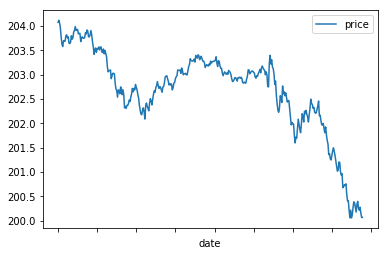

In [12]:
df_time.plot(x='date', y='price')

In [13]:
df_ticks = pd.read_csv('SPY.TradesOnly.012815.csv')

In [14]:
df = df_ticks[::1000]

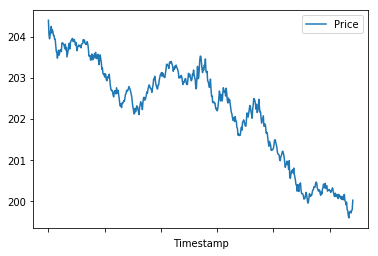

In [15]:
df.plot(x='Timestamp', y='Price')

In [16]:
# Volume bar for each 100,000 units traded
ts = []
prices = []
vol = 0
vol_cutoff = 100000
for idx, row in df_ticks.iterrows():
    vol += row.Quantity
    if vol >= vol_cutoff:
        ts.append(row.Timestamp)
        prices.append(row.Price)
        vol = vol - vol_cutoff
        while vol >= vol_cutoff:
            ts.append(row.Timestamp)
            prices.append(row.Price)
            vol = vol - vol_cutoff

In [17]:
df_vol = pd.DataFrame(data={'Timestamp': ts, 'Price': prices})

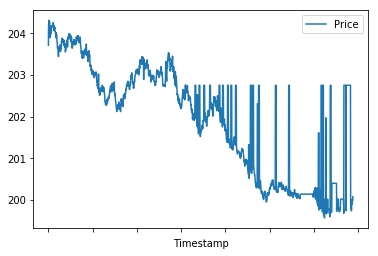

In [18]:
df_vol.plot(x='Timestamp', y='Price')

In [20]:
# Dollar bars for each $10m exchanged
ts = []
prices = []
dollars = 0
dol_cutoff = 10000000
for idx, row in df_ticks.iterrows():
    dollars += (row.Quantity * row.Price)
    if dollars >= dol_cutoff:
        ts.append(row.Timestamp)
        prices.append(row.Price)
        dollars = dollars - dol_cutoff
        while dollars >= dol_cutoff:
            ts.append(row.Timestamp)
            prices.append(row.Price)
            dollars = dollars - dol_cutoff

In [21]:
df_dol = pd.DataFrame(data={'Timestamp': ts, 'Price': prices})

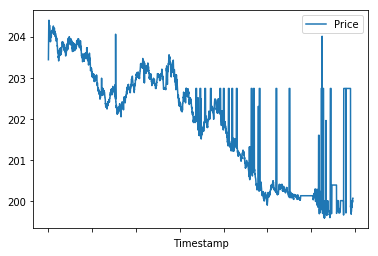

In [22]:
df_dol.plot(x='Timestamp', y='Price')

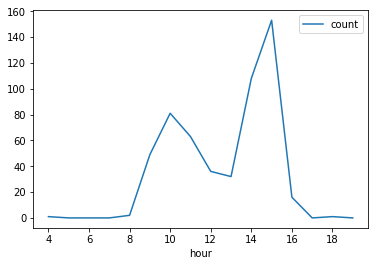

In [23]:
index = pd.DatetimeIndex(df['Timestamp'])
hours = list(range(4, 20))
count = []
for h in hours:
    count.append(len(df.iloc[index.indexer_between_time(str(h) + ':00', str(h+1) + ':00')]))
    
df_tick_count = pd.DataFrame(data={'hour': hours, 'count': count})
df_tick_count.plot(x='hour', y='count')

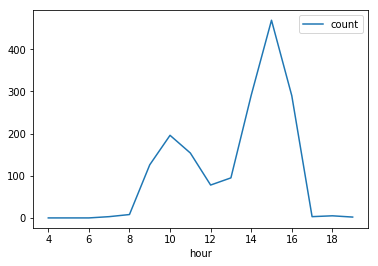

In [24]:
index = pd.DatetimeIndex(df_vol['Timestamp'])
hours = list(range(4, 20))
count = []
for h in hours:
    count.append(len(df_vol.iloc[index.indexer_between_time(str(h) + ':00', str(h+1) + ':00')]))

df_vol_count = pd.DataFrame(data={'hour': hours, 'count': count})
df_vol_count.plot(x='hour', y='count')

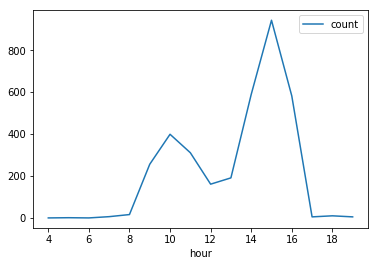

In [25]:
index = pd.DatetimeIndex(df_dol['Timestamp'])
hours = list(range(4, 20))
count = []
for h in hours:
    count.append(len(df_dol.iloc[index.indexer_between_time(str(h) + ':00', str(h+1) + ':00')]))

df_dol_count = pd.DataFrame(data={'hour': hours, 'count': count})
df_dol_count.plot(x='hour', y='count')

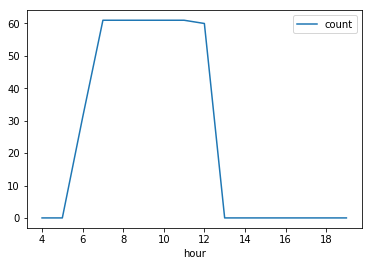

In [26]:
index = pd.DatetimeIndex(df_time['date'])
hours = list(range(4, 20))
count = []
for h in hours:
    count.append(len(df_time.iloc[index.indexer_between_time(str(h) + ':00', str(h+1) + ':00')]))

df_time_count = pd.DataFrame(data={'hour': hours, 'count': count})
df_time_count.plot(x='hour', y='count')